# Classification using Neural Networks with Python

## Import Libraries

In [48]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Data Preparation

In [49]:
def load_csv(data):
    dataset = pd.read_csv(data)
    return dataset

In [50]:
def variable_data(dataset):
    # target 
    target = dataset.values[:, 2].astype('uint8')
    # spectra
    spectra = dataset.values[:, 3:].astype('float')
    # wavelengt
    cols = list(dataset.columns.values.tolist())
    wls = [float(x) for x in cols[3:]]
    return target, spectra, wls

In [51]:
"""DATA DIRECTORY"""
path = 'd://z/master/aicourse/dataset/'
arabica_kintamani =  path + 'SWNIR_ABA.csv'
arabica_gayo = path + 'SWNIR_AGA.csv'
arabica_temanggung = path + 'SWNIR_ATE.csv'
arabica_toraja = path + 'SWNIR_ATO.csv'

"""LOAD DATA"""
data_aki = load_csv(arabica_kintamani); data_aga = load_csv(arabica_gayo)
data_ate = load_csv(arabica_temanggung); data_ato = load_csv(arabica_toraja)

"""COMBINE DATA"""
arabica_swnir = pd.concat([data_aki, data_aga, data_ate, data_ato])

"""LABEL NAME or SAMPLE CLASSES"""
label_name_arabica = ['Kintamani', 'Gayo', 'Temanggung', 'Toraja']

"""EXTRACTING DATA VARIABLES"""
label_arabica, spectra_arabica, wls_arabica = variable_data(arabica_swnir)
label_gayo, spectra_gayo, wls_gayo = variable_data(data_aga)
label_kintamani, spectra_kintamani, wls_kintamani = variable_data(data_aki)
label_temanggung, spectra_temanggung, wls_temanggung = variable_data(data_ate)
label_toraja, spectra_toraja, wls_toraja = variable_data(data_ato)

"""OBTAINING AVERAGE SPECTRA"""
mean_gayo = np.mean(spectra_gayo, axis=0)
mean_kintamani = np.mean(spectra_kintamani, axis=0)
mean_temanggung = np.mean(spectra_temanggung, axis=0)
mean_toraja = np.mean(spectra_toraja, axis=0)


In [52]:
"""PLOT SPECTRA"""
def plot_spectra(x, y):
    fig = plt.figure(figsize=(6, 5))
    ax = fig.add_subplot()
    ax.xaxis.label.set_color('black')
    ax.yaxis.label.set_color('black')
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')
    ax.spines['left'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['bottom'].set_color('black')
    plt.plot(x, y.T)
    plt.xticks()    # np.arange(400, 1000, step=50),
    plt.ylabel('Reflectance (%)')
    plt.xlabel('Wavelength (nm)')
    plt.grid(False) # visible=None, which='major', axis='both', **kwargs
    plt.show()

def plot_average_spectra(wls, mean1, mean2, mean3, mean4, legend):
    fig = plt.figure(figsize=(6, 5))
    ax = fig.add_subplot()
    ax.xaxis.label.set_color('black')
    ax.yaxis.label.set_color('black')
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')
    ax.spines['left'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['bottom'].set_color('black')
    plt.plot(wls, mean1.T)
    plt.plot(wls, mean2.T)
    plt.plot(wls, mean3.T)
    plt.plot(wls, mean4.T)
    plt.xticks()    # np.arange(400, 1000, step=50),
    plt.yticks()#np.arange(0, 70, step=10))
    plt.ylabel('Reflectance (%)')
    plt.xlabel('Wavelength (nm)')
    plt.legend(legend, loc = 'best')
    plt.grid(False) # visible=None, which='major', axis='both', **kwargs
    plt.show()


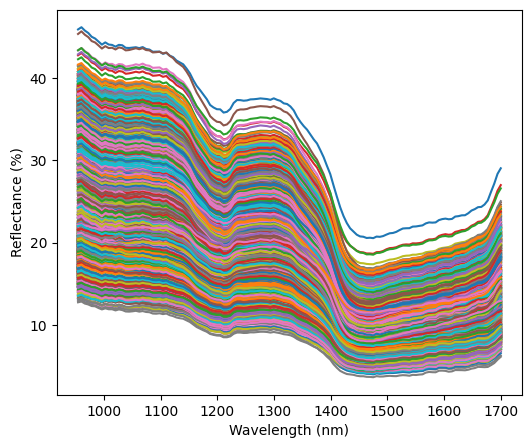

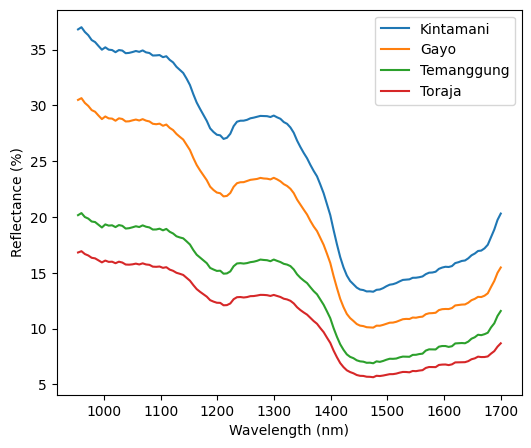

In [53]:
"""PLOT SPECTRA"""
plot_spectra(wls_arabica, spectra_arabica)
plot_average_spectra(
    wls_arabica, mean_gayo, 
    mean_kintamani,
    mean_temanggung, 
    mean_toraja, 
    label_name_arabica
)

In [54]:
x_col = spectra_arabica.shape[1]
x_row = spectra_arabica.shape[0]
print('number of data: ', x_row)
print('number of variable: ', x_col)

number of data:  2000
number of variable:  128


## Data Standardization

In [55]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def standardscaler(input):
    return StandardScaler().fit_transform(input)

x_std = standardscaler(spectra_arabica)

## Label Encoding

In [56]:
from sklearn.preprocessing import label_binarize, LabelEncoder

"""LABEL ENCODING"""
Y = label_binarize(label_arabica, classes=[0,1,2,3])


## Data Split

In [57]:
from sklearn.model_selection import train_test_split

"""DATA SPLIT"""
x_train, x_test, y_train, y_test = train_test_split(x_std, Y, test_size=0.2, random_state=42)

## Build Neural Networks

Epoch 1/100


d:\z\master\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5112 - loss: 1.2275 - val_accuracy: 0.5625 - val_loss: 1.0723
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5756 - loss: 1.0904 - val_accuracy: 0.6375 - val_loss: 1.0069
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5997 - loss: 1.0341 - val_accuracy: 0.6438 - val_loss: 0.9748
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6803 - loss: 0.9930 - val_accuracy: 0.7563 - val_loss: 0.9390
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7104 - loss: 0.9091 - val_accuracy: 0.6625 - val_loss: 0.6906
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6583 - loss: 0.6821 - val_accuracy: 0.6562 - val_loss: 0.6310
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7717 - loss: 0.6230 - val_accuracy: 0.8062 - val_loss: 0.5943
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8377 - loss: 0.5802 - val_accuracy: 0.8438 - val_loss: 0.5

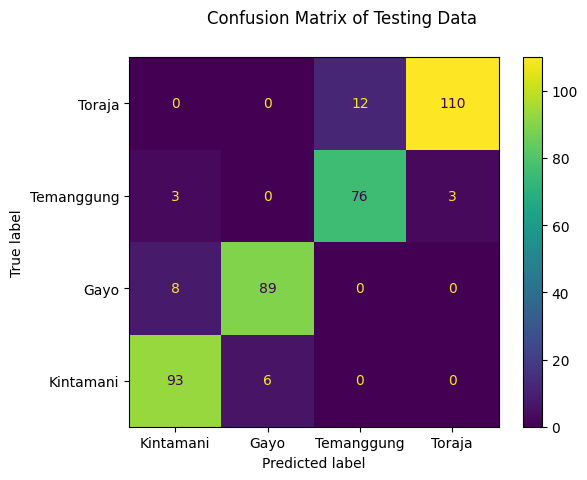

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        99
           1       0.94      0.92      0.93        97
           2       0.86      0.93      0.89        82
           3       0.97      0.90      0.94       122

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



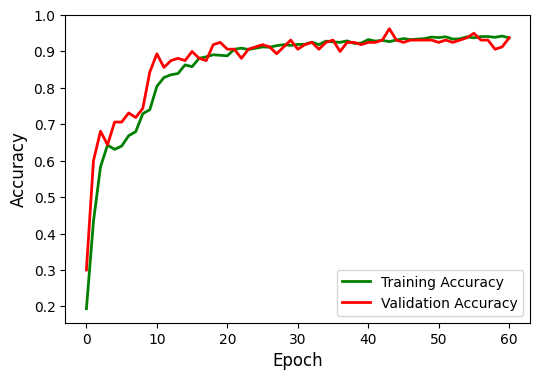

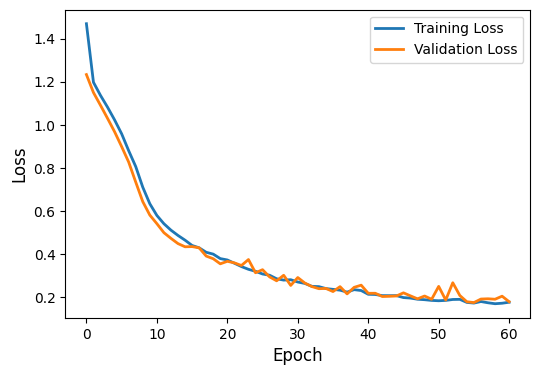

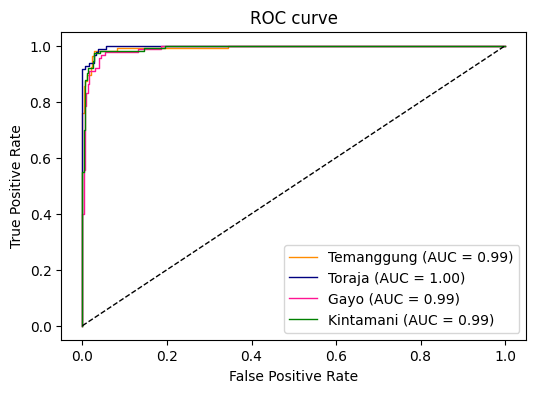

In [58]:
# BUILDING NEURAL NETWORK
from keras import models, layers, callbacks, optimizers
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import KFold

# Use a Manual Verification Dataset -----------------------------------------------------------------------
seed = 7
np.random.seed(seed)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []

for train, test in kfold.split(x_train, y_train):
    # --- Neural network
    model = models.Sequential([
        layers.Dense(128, input_dim = x_col, activation='relu', kernel_initializer='he_uniform'),
        layers.Dense(64, activation='relu', kernel_initializer='he_uniform'),
        layers.Dense(32, activation='relu', kernel_initializer='he_uniform'),
        layers.Dense(16, activation='relu', kernel_initializer='he_uniform'),
        layers.Dense(8, activation='relu', kernel_initializer='he_uniform'),
        layers.Dense(4, activation='softmax', kernel_initializer='he_uniform'),
    ])
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizers.Adam(learning_rate=0.0001),
                  metrics=['accuracy'])
    earlystopping = callbacks.EarlyStopping(monitor='val_loss',     
                                            min_delta=0,
                                            patience=5,             
                                            verbose=0,
                                            mode='min',            
                                            baseline=None,
                                            restore_best_weights=True)
    
    history = model.fit(x_train[train], y_train[train], epochs=100, batch_size=32, validation_data=(x_train[test],y_train[test]), callbacks=[earlystopping], verbose=1)
    scores = model.evaluate(x_train[test], y_train[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

y_pred = model.predict(x_test)

# --- Converting predictions to label
pred_val = list()
for i in range(len(y_pred)):
    pred_val.append(np.argmax(y_pred[i]))

# --- Converting one hot encoded test label to label
test_val = list()
for i in range(len(y_test)):
    test_val.append(np.argmax(y_test[i]))

# MODEL's PERFORMANCE
b = accuracy_score(pred_val,test_val)
print('The accuracy of testing data is:', b*100)

# --- Confusion Matrix
cm_val = confusion_matrix(pred_val, test_val)
print(cm_val)

display = ConfusionMatrixDisplay(cm_val,display_labels=label_name_arabica)
display.plot()
display.figure_.suptitle("Confusion Matrix of Testing Data")
plt.gca().invert_yaxis()
plt.grid(False)
plt.show()

# --- Performace Metrics
res = classification_report(pred_val, test_val)
print(res)

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
ax.xaxis.label.set_color('black')        
ax.yaxis.label.set_color('black')        
ax.tick_params(axis='x', colors='black') 
ax.tick_params(axis='y', colors='black') 
ax.spines['left'].set_color('black')     
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['bottom'].set_color('black')
plt.plot(history.history['accuracy'], linewidth=2.0, color='g')
plt.plot(history.history['val_accuracy'], linewidth=2.0, color='r')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['Training Accuracy ', 'Validation Accuracy'], loc='lower right', fontsize=10)
plt.grid(False)
plt.show()

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
ax.xaxis.label.set_color('black')        
ax.yaxis.label.set_color('black')        
ax.tick_params(axis='x', colors='black') 
ax.tick_params(axis='y', colors='black') 
ax.spines['left'].set_color('black')     
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['bottom'].set_color('black')
plt.plot(history.history['loss'], linewidth=2.0)
plt.plot(history.history['val_loss'], linewidth=2.0)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right', fontsize=10)
plt.grid(False)
plt.show()

# ROC-AUC curve
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i], )
    roc_auc[i] = auc(fpr[i], tpr[i])

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.xaxis.label.set_color('black')       
ax.yaxis.label.set_color('black')       
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.spines['left'].set_color('black')    
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['bottom'].set_color('black')
plt.plot(fpr[0], tpr[0], color = 'darkorange', lw = 1, 
         label = 'Temanggung (AUC = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color = 'navy', lw = 1, 
         label = 'Toraja (AUC = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color = 'deeppink', lw = 1, 
         label = 'Gayo (AUC = %0.2f)' % roc_auc[2])
plt.plot(fpr[3], tpr[3], color = 'green', lw = 1, 
         label = 'Kintamani (AUC = %0.2f)' % roc_auc[3])
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.grid(False)
plt.show()